In [12]:
# Run this cell once when starting on notebook.
# On Google Colab, wait for the Google Drive permission prompts before proceeding
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
try:
    %load_ext jupyter_ai_magics
except:
    print("%%ai cells will not work in this notebook")
    print("Please use Gemini for AI queries instead")
from datascience import *
import numpy as np
import math

DATA_FILENAME="data/ILPD.csv"
try:
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)
  !mkdir -p /content/data
  !gdown --fuzzy https://drive.google.com/file/d/1VSNdp_68F-AxjDfDMOryx7RMMp-27uQK/view?usp=drive_link -O /content/data/ILPD.csv
  DATA_FILENAME = DATA_FILENAME.replace("data", "/content/data/")
  !ls -l /content/data
except:
  print("Google Drive not mounted; this is normal on Jupyter Hub")


The jupyter_ai_magics extension is already loaded. To reload it, use:
  %reload_ext jupyter_ai_magics
Google Drive not mounted; this is normal on Jupyter Hub


# CS5A S25 Final Project: LiverDisease

* Please refer to the general instructions in [this document](https://docs.google.com/document/d/1qgS-GPKsbcbqNq8bbDk8kiB0bH-HRZcfN4La75bOtWU/edit?usp=sharing) before starting.
* You may work on either JupyterHub or Google Colab


If working on Colab:

* The Google Colab version is [this folder](https://drive.google.com/drive/folders/1wsVszAufxxmSR7_uoOoR6QBQmjlurPNx?usp=drive_link)
* Make a copy of the notebook in your group folder for the final team project before starting to make edits.
* If/when working in the same file, be sure to coordinate with your group so that only one member of the group is editing at a time; Colab doesn't handle simulataneous editing very well.






## Names

Please list all students that were a member of this team

1. Kenny Vang
2. Student Name 2
3. Student Name 3
4. Student Name 4

## Member Responsibilities


*Write your team member responsibility distribution here* (See [instructions](https://docs.google.com/document/d/1gYMuXukOTtJkEthxUeHmWuA1Qn9BtIYkSJa37Gb524E/edit?tab=t.0#bookmark=id.igbdergm85kj))

I do questions 3, 4, and 5

## Liver Disorders Dataset

Death by liver cirrhosis continues to increase, given the increase in alcohol consumption rates, chronic hepatitis infections, and obesity-related liver disease. Notwithstanding the high mortality of this disease, liver diseases do not affect all sub-populations equally. The early detection of pathology is a determinant of patient outcomes. The dataset comprises 584 patient records collected from the NorthEast of Andhra Pradesh, India.
* **Age**: Patient's age.
* **Gender**: Patient's gender.
* **Total Bilirubin (TB)**: The total amount of bilirubin in the blood, a yellow pigment produced by the breakdown of red blood cells.
* **Direct Bilirubin (DB)**: The direct fraction of bilirubin, specifically associated with liver function.
* **Total Proteins (TP)**: The total amount of proteins in the blood, including albumin and globulins.
* **Albumin (ALB)**: A protein synthesized by the liver, crucial for maintaining blood volume and pressure.
* **A/G Ratio**: The ratio of albumin to globulins, providing insights into liver and kidney function.
* **SGPT (Serum Glutamic Pyruvic Transaminase)**: An enzyme indicating liver health; elevated levels may suggest liver damage.
* **SGOT (Serum Glutamic Oxaloacetic Transaminase)**: Another liver enzyme reflecting liver function; elevated levels may indicate liver problems.
* **Alkphos (Alkaline Phosphatase)**: An enzyme associated with the biliary system; elevated levels may indicate liver or bone issues.
*  **Selector**: Class labels for healthy (*1*) vs diagnosed with liver desease (*2*) patients.

Please refer to [Chapter 11: Hypothesis testing](https://inferentialthinking.com/chapters/11/Testing_Hypotheses.html) and [Chapter 12.1: A/B Testing](https://inferentialthinking.com/chapters/12/1/AB_Testing.html) when completing this final project as many of the questions use concepts covered there!

In [3]:
# Read the dataset
patients_uncleaned = Table.read_table(DATA_FILENAME)

# Display the first few rows of the table
patients_uncleaned.show(10)

Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
62,Male,7.3,4.1,490,60,68,7,3.3,0.89,1
58,Male,1,0.4,182,14,20,6.8,3.4,1,1
72,Male,3.9,2,195,27,59,7.3,2.4,0.4,1
46,Male,1.8,0.7,208,19,14,7.6,4.4,1.3,1
26,Female,0.9,0.2,154,16,12,7,3.5,1,1
29,Female,0.9,0.3,202,14,11,6.7,3.6,1.1,1
17,Male,0.9,0.3,202,22,19,7.4,4.1,1.2,2
55,Male,0.7,0.2,290,53,58,6.8,3.4,1,1


**Question 1.** As you you've already learned while working on your midterm project, real-world datasets do not always have complete information! Missing values (`nan`) can be spotted in the dataset that was provided. Let's do some data cleaning first and then understand what each of the columns means.

There are many ways to work with missing or skewed data. For now, we will just choose to delete any rows that have missing information. Name the final table something meaningful - like `patients`. This will be the table we use to answer all the other questions.

Hint: One way you can do this is by writing a function and then using the `apply()` function.

In [4]:
# SOLUTION

#def the function in order to clean table
def count_nans(table, column_name):
    return np.count_nonzero(np.isnan(table.column(column_name)))

# checking to see which rows as nans in it
age_nans = count_nans(patients_uncleaned, "Age")
print(f"Number of missing values in the 'Age' column: {age_nans}")

tb_nans = count_nans(patients_uncleaned, "TB")
print(f"Number of missing values in the TB column: {tb_nans}")

db_nans = count_nans(patients_uncleaned, "DB")
print(f"Number of missing values in the DB column: {db_nans}")

Alkphos_nans = count_nans(patients_uncleaned, "Alkphos")
print(f"Number of missing values in the Alkphos column: {Alkphos_nans}")

alb_nans = count_nans(patients_uncleaned, "ALB")
print(f"Number of missing values in the ALB column: {alb_nans}")

Sgpt_nans = count_nans(patients_uncleaned, "Sgpt")
print(f"Number of missing values in the Sgpt column: {Sgpt_nans}")


Sgot_nans = count_nans(patients_uncleaned, "Sgot")
print(f"Number of missing values in the Sgot column: {Sgot_nans}")

TP_nans = count_nans(patients_uncleaned, "TP")
print(f"Number of missing values in the TP column: {TP_nans}")

ALB_nans = count_nans(patients_uncleaned, "ALB")
print(f"Number of missing values in the ALB column: {ALB_nans}")

ag_ratio_nans = count_nans(patients_uncleaned, "A/G Ratio")
print(f"Number of missing values in the A/G Ratio column: {ag_ratio_nans}")

selector_nans = count_nans(patients_uncleaned, "Selector")
print(f"Number of missing values in the Selector column: {selector_nans}")


#filter the row
patients = patients_uncleaned.where("A/G Ratio", are.not_equal_to(np.nan))
patients

Number of missing values in the 'Age' column: 0
Number of missing values in the TB column: 0
Number of missing values in the DB column: 0
Number of missing values in the Alkphos column: 0
Number of missing values in the ALB column: 0
Number of missing values in the Sgpt column: 0
Number of missing values in the Sgot column: 0
Number of missing values in the TP column: 0
Number of missing values in the ALB column: 0
Number of missing values in the A/G Ratio column: 4
Number of missing values in the Selector column: 0


Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
62,Male,7.3,4.1,490,60,68,7,3.3,0.89,1
58,Male,1,0.4,182,14,20,6.8,3.4,1,1
72,Male,3.9,2,195,27,59,7.3,2.4,0.4,1
46,Male,1.8,0.7,208,19,14,7.6,4.4,1.3,1
26,Female,0.9,0.2,154,16,12,7,3.5,1,1
29,Female,0.9,0.3,202,14,11,6.7,3.6,1.1,1
17,Male,0.9,0.3,202,22,19,7.4,4.1,1.2,2
55,Male,0.7,0.2,290,53,58,6.8,3.4,1,1


In [5]:
#CHECK TO SEE IF IT IS FILTER
ag_ratio_nans = count_nans(patients, "A/G Ratio")
print(f"Number of nans in A/G: {age_nans}")

Number of nans in A/G: 0


### Enter prompt below:


In [6]:
%%ai openai-chat:gpt-4

UsageError: %%ai is a cell magic, but the cell body is empty. Did you mean the line magic %ai (single %)?


### Explain your answer below:

*type your answer here*



**Question 2.** Explore the relationship between the *Total Proteins* and *Albumin*. Is there a correlation between the total amount of proteins in the blood and albumin? Think about what kind of plots you can make to show a correlation between two columns? What do you infer from this plot?

In [ ]:
# SOLUTION

### Enter prompt below:


In [ ]:
%%ai openai-chat:gpt-4

### Explain your answer below:

*type your answer here*



**Question 3.** Analyze the distribution of the ages of subjects in the dataset. Are most of the subjects young, old, or is there a uniform distribution across different ages?

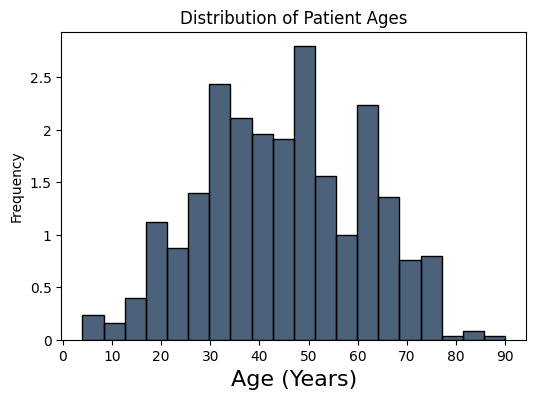

In [ ]:
# SOLUTION
patients.hist("Age", bins=20) # Removed trailing comma

# Define the specific x-axis ticks you want
custom_ticks = list(np.arange(0, 91, 10))

plt.xticks(custom_ticks)
plt.xlabel("Age (Years)")
plt.ylabel("Frequency")
plt.title("Distribution of Patient Ages")
plt.show()

In [ ]:
Age_column = patients.column("Age")
AC_mean = np.mean(Age_column)
AC_mean

44.746140651801028

In [ ]:
AC_median = np.median(Age_column)
AC_median

45.0

In [ ]:
np.min(Age_column)

4

In [ ]:
np.max(Age_column)

90

### Enter prompt below:


In [ ]:
%%ai openai-chat:gpt-4

### Explain your answer below:

For Question 3, I created a 20-bin histogram of patient ages, clearly labeling it with a title, axis labels, and 10-year ticks on the age axis. I then calculated key statistics (mean, median, min, max) and used these, along with the histogram, to describe the age distribution. I observed that most patients are middle-aged (30-60), meaning the distribution isn't uniform. The average patient age is 45, with the youngest being 4 and the oldest 90.

**Question 4.** What is the probability of a man under the age of 60 being diagnosed with liver disease? What about a woman under the same age? Visualize the two probabilities.


The probability of a man under the age of 60 being diagnosed with liver disease is 27.146814404432135% 
While the probability for a woman under those same conditions is 34.146341463414636%


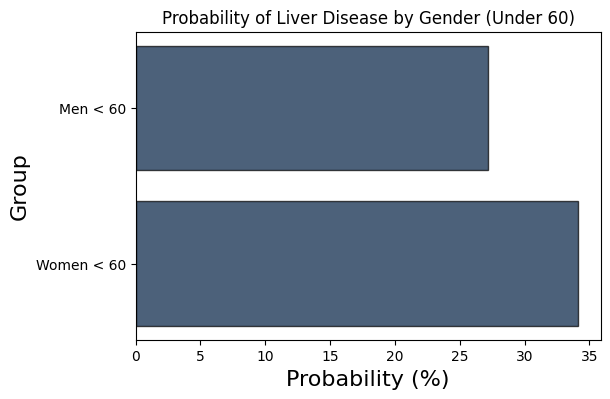

In [39]:
# SOLUTION
men_under_60_table = patients.where("Gender", are.equal_to("Male")).where("Age", are.below_or_equal_to(60))
men_under_60_with_liver_disease_table_with_liver_disease = patients.where("Gender", are.equal_to("Male")).where("Selector", are.equal_to(2)).where("Age", are.below_or_equal_to(60))
men_answer = men_under_60_with_liver_disease_table_with_liver_disease.num_rows / men_under_60_table.num_rows * 100

women_under_60_table = patients.where("Gender", are.equal_to("Female")).where("Age", are.below_or_equal_to(60))
women_under_60_with_liver_disease_table_with_liver_disease = patients.where("Gender", are.equal_to("Female")).where("Selector", are.equal_to(2)).where("Age", are.below_or_equal_to(60))
women_answer = women_under_60_with_liver_disease_table_with_liver_disease.num_rows / women_under_60_table.num_rows * 100
print("The probability of a man under the age of 60 being diagnosed with liver disease is", f"{men_answer}%", "\n" "While the probability for a woman under those same conditions is", f"{women_answer}%")

categories = ["Men < 60", "Women < 60"]
probabilities = [men_answer, women_answer]

prob_table = Table().with_columns(
    "Group", categories,
    "Probability of Liver Disease (%)", probabilities
)

prob_table.barh("Group", "Probability of Liver Disease (%)")
plt.title("Probability of Liver Disease by Gender (Under 60)")
plt.xlabel("Probability (%)")
plt.ylabel("Group")
plt.show()



### Enter prompt below:


In [ ]:
%%ai openai-chat:gpt-4

### Explain your answer below:

*type your answer here*



**Question 5.** Plot a graph that shows how the total amount of bilirubin (TB) in the blood changes with respect to the direct fraction of bilirubin (DB) for female subjects who suffer from liver cirrhosis. Is a high concentration of bilirubin in the blood associated with an elevated direct fraction of bilirubin?

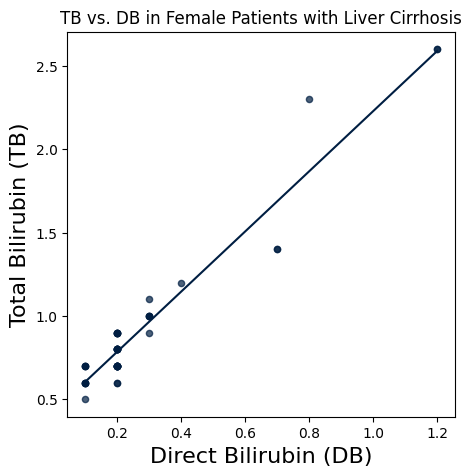

In [16]:
# SOLUTION
female_patients = patients.where("Gender", are.equal_to("Female")).where("Selector", are.equal_to(2))
female_patients.scatter("DB", "TB", fit_line=True)
plt.xlabel("Direct Bilirubin (DB)")
plt.ylabel("Total Bilirubin (TB)")
plt.title("TB vs. DB in Female Patients with Liver Cirrhosis")
plt.show()

### Enter prompt below:


In [ ]:
%%ai openai-chat:gpt-4

### Explain your answer below:

 For Question 5, I started by filtering the main data to get just the female patients with liver cirrhosis, using the 'Gender' and 'Selector' columns. With that specific data, I then made a scatter plot showing Direct Bilirubin (DB) on the x-axis and Total Bilirubin (TB) on the y-axis, and I added a line of best fit to visualize the trend. When I saw the plot, I noticed a pretty clear upward pattern: as DB levels went up, TB levels tended to rise as well, and the upward slope of the trend line definitely showed this. So, based on what I saw in the plot, I concluded that for these female patients, a high Total Bilirubin is linked to an elevated Direct Bilirubin.


**Question 6.** We will now perform a hypothesis test. A new study has recently been published saying liver cirrhosis is way more likely for men than it is for women. Evaluate the validity of this model based on your dataset. What could the null and alternate hypotheses be? Create a visualization to display the distribution of test statistic.

*Hint*: Assume the prevalence of liver cirrhosis is the same for both men and women in the dataset, meaning that individual probabilities will not depend on various factors and can be derived directly from the patients' gender ratio.

In [ ]:
# SOLUTION

### Enter prompt below:


In [ ]:
%%ai openai-chat:gpt-4

### Explain your answer below:

*type your answer here*



**Question 7.** Now use the information you have to conduct an A/B Test. Run simulations and use a p-value cutoff of 5% to determine if your observation is statistically significant

In [ ]:
# SOLUTION

### Enter prompt below:


In [ ]:
%%ai openai-chat:gpt-4

### Explain your answer below:

*type your answer here*



**Question 8.** Now we aim to conduct a study to see whether the concentration of albumin is associated with liver cirrhosis in female subjects. You should evaluate your results by demonstrating a complete A/B testing analysis. State a conclusion from this test using a p-value cutoff of 5%.

In [ ]:
# SOLUTION

### Enter prompt below:


In [ ]:
%%ai openai-chat:gpt-4

### Explain your answer below:

*type your answer here*



### Question 9 (Novel Analysis Part 1):

**Question 9 (Novel Analysis Part 1):**

Design your own A/B test! Choose one variable whose trends you would like to investigate, and create a new table with that variable's data for the years and states you would like to analyze. Remember to divide the overall table into two groups that you want to compare for the test, and conduct an A/B test investigating the differences between the two groups.

Let's begin the process.

a) Define null and alternate hypotheses.

b) Plot the observed distribution of the variable you will be observing

c) State your test statistic value and what it means in the context of the problem.

In [ ]:
# SOLUTION

### Enter prompt below:


In [ ]:
%%ai openai-chat:gpt-4

### Explain your answer below:

*type your answer here*



### Question 10 (Novel Analysis Part 2):

Continue the A/B Test from Question 9!


a) Simulate the test statistic under the null hypothesis and visualize the results.

b) Select a significance level for your test and state the conclusion of the hypothesis test.

In [ ]:
# SOLUTION

### Enter prompt below:


In [ ]:
%%ai openai-chat:gpt-4

### Explain your answer below:

*type your answer here*

